### Reproducing Images - this project reproduces a single image using PyGAD by evolving pixel values

### Project Steps

#### 1.Read an image
#### 2.Prepare the fitness function
#### 3.Create an instance of the pygad.GA class with the appropriate parameters
#### 4.Run PyGAD
#### 5. Plot results
#### 6.Calculate some statistics

In [11]:
# Read an Image
# There is an image named fruit.jpg in the GARI project which is read according to the next code.

In [12]:
import imageio
import numpy

target_im = imageio.imread('fruit.jpg')
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

In [13]:

#Prepare the Fitness Function
#The next code creates a function that will be used as a fitness function for calculating the fitness value 
#for each solution in the population. This function must be a maximization function that accepts 2 parameters
#representing a solution and its index. It returns a value representing the fitness value.

In [14]:
import gari

target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [15]:
import numpy
import functools
import operator

def img2chromosome(img_arr):
    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [16]:
#Create an Instance of the pygad.GA Class¶

In [17]:
import pygad

ga_instance = pygad.GA(num_generations=20000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

In [18]:
#Run Pygad
ga_instance.run()

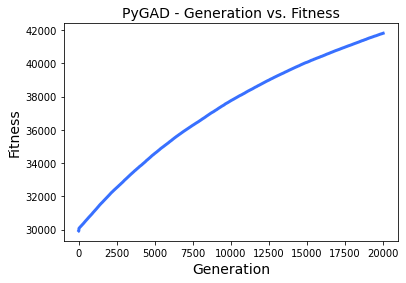

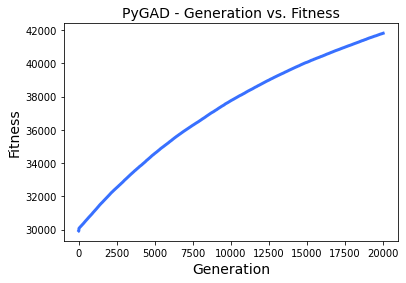

In [19]:
#PLot results
ga_instance.plot_fitness()

In [20]:
#Calculate Some Statistics
#Here is some information about the best solution.

Fitness value of the best solution = 41803.7707241125
Index of the best solution : 0
Best fitness value reached after 19999 generations.


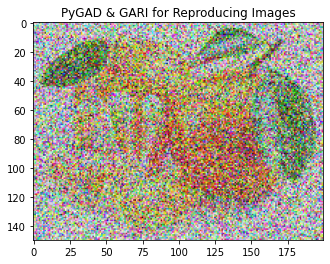

In [21]:
import matplotlib

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = gari.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()